# Perceptrón multicapa explicado con un ejemplo real y código Python
El Perceptrón Multicapa es una Red Neuronal que aprende la relación entre datos lineales y no lineales.

Basado en: https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141

## Todo empezó con una neurona
A principios de los años 40, Warren McCulloch, neurofisiólogo, se asoció con el lógico Walter Pitts para crear un modelo del funcionamiento del cerebro. Era un modelo lineal simple que producía una salida positiva o negativa, dado un conjunto de entradas y pesos.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*KAJBM4Fq-f96pibxNjusbA.png)

## Modelo neuronal de McCulloch y Pitts.
Este modelo de computación se llamó intencionadamente neurona, porque intentaba imitar el funcionamiento del núcleo del cerebro. Al igual que las neuronas del cerebro reciben señales eléctricas, la neurona de McCulloch y Pitts recibía entradas y, si estas señales eran lo suficientemente fuertes, las transmitía a otras neuronas.

## Neurona y sus diferentes componentes.
La primera aplicación de la neurona reproducía una puerta lógica, donde se tienen una o dos entradas binarias, y una función booleana que sólo se activa dadas las entradas y pesos correctos.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*aj8HMsImg0duogH_xeQorQ.jpeg)

## Ejemplo de las puertas lógicas AND y OR (Imagen del autor).
Sin embargo, este modelo tenía un problema. No podía aprender como el cerebro. La única forma de obtener la salida deseada era que los pesos, que funcionaban como catalizadores en el modelo, estuvieran fijados de antemano.

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*H50XJ8vJvDoRi35Qq37BbA.png)

El sistema nervioso es una red de neuronas, cada una de las cuales tiene un soma y un axón [...] En cualquier instante, una neurona tiene cierto umbral que la excitación debe superar para iniciar un impulso. Sólo una década más tarde, Frank Rosenblatt amplió este modelo y creó un algoritmo capaz de aprender los pesos para generar una salida. Basándose en la neurona de McCulloch y Pitt, Rosenblatt desarrolló el perceptrón.

# Perceptrón
Aunque hoy en día el perceptrón es ampliamente reconocido como un algoritmo, inicialmente se concibió como una máquina de reconocimiento de imágenes. Su nombre se debe a que realiza una función de percepción similar a la humana: ver y reconocer imágenes.

En particular, el interés se ha centrado en la idea de una máquina que fuera capaz de conceptualizar las entradas que inciden directamente desde el entorno físico de luz, sonido, temperatura, etc. -el "mundo fenoménico" con el que todos estamos familiarizados- en lugar de requerir la intervención de un agente humano para digerir y codificar la información necesaria[4].

La máquina perceptrón de Rosenblatt se basaba en una unidad básica de cálculo, la neurona. Al igual que en los modelos anteriores, cada neurona tiene una célula que recibe una serie de pares de entradas y pesos.

La principal diferencia en el modelo de Rosenblatt es que las entradas se combinan en una suma ponderada y, si la suma ponderada supera un umbral predefinido, la neurona se dispara y produce una salida.


Modelo neuronal de perceptrón (izquierda) y lógica de umbral (derecha). (Imagen del autor)
El umbral T representa la función de activación. Si la suma ponderada de las entradas es mayor que cero, la neurona emite el valor 1; en caso contrario, el valor de salida es cero.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*FBJqWE6AHt8HMZ7XHW9uWg.png)

![](https://fotografias.lasexta.com/clipping/cmsimages01/2015/12/18/5C54FAA8-F5C3-4C1B-90FA-38D15BA19D39/98.jpg?crop=2309,1299,x0,y216&width=1900&height=1069&optimize=high&format=webply)

# Manos a la obra

## Dos conjuntos de datos para hoy...
### https://www.kaggle.com/datasets/anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt

Contiene las preguntas de los 16 Tests de Personalidad y sus respuestas en la Escala que utilizan pero codificada numéricamente:

Totalmente de acuerdo: 3
Parcialmente de acuerdo: 2
Ligeramente de acuerdo: 1
Neutral -> 0
Ligeramente en desacuerdo: -1
Parcialmente en desacuerdo: -2
Totalmente en desacuerdo: -3

Método
La metodología ha sido truculenta. Se ha dedicado mucho esfuerzo y reflexión a la elaboración de estos datos. Aunque los datos son sintéticos, una vez que empiece a trabajar con el conjunto de datos se dará cuenta de que se trata de un dato de clasificación válido.

Información adicional:
Se trata de datos generados sintéticamente, generé un conjunto de datos de clasificación, convertí los números aleatorios en números enteros (escala Likert), y basándome en los rasgos de cada personalidad, aumenté/disminuí los valores de algunos rasgos (preguntas que determinan Intuitivo/Juzgar/Pensar), etc, y luego probé algunos modelos de clasificación para ver si estos datos realmente son válidos. Esta es la undécima versión y estoy trabajando constantemente para afinar el conjunto de datos, característica por característica, intentando reducir/escalar los valores de ciertas características en función de la personalidad (columna objetivo) a la que corresponden. Así que construir un conjunto de datos de esta magnitud y convertirlo en un conjunto de datos válido me costará mucho esfuerzo, pero todavía estoy perfeccionándolo. De hecho, cada semana mejoro el conjunto de datos y ejecuto algunos scripts AutoML Pycaret y ajusto algunos hiperparámetros para ver si la calidad ha mejorado 😅. Así que esto es como un tema de investigación en sí mismo y, finalmente, llegar a ser una fuente en sí mismo para las personas que quieren trabajar en este problema.

### https://www.kaggle.com/datasets/prathamtripathi/drug-classification

Ya que como principiante en el aprendizaje automático sería una gran oportunidad para probar algunas técnicas para predecir el resultado de los medicamentos que podrían ser precisas para el paciente.

La característica objetivo es
- Tipo de fármaco
Los conjuntos de características son:
- Edad, Sexo, Niveles de presión arterial (PA), Niveles de colesterol, Ración de Na a Potasio,

El principal problema aquí no son sólo los conjuntos de características y los conjuntos de objetivos, sino también el enfoque que se adopta para resolver este tipo de problemas como principiante. Así que mucha suerte.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Vamos con el conjunto de datos de las drogas

In [2]:
data1=pd.read_csv("drug200.csv")
data1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
data1["Drug"].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [4]:
pd.get_dummies(data1, dtype=float)

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,23,25.355,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,47,13.093,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,47,10.114,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28,7.798,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,61,18.043,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
196,16,12.006,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
197,52,9.894,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
198,23,14.020,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [5]:
#### Recuerde!!!!!
#1. Dividir el conjunto nen variables dependientes e independientes
X=pd.get_dummies(data1.drop(columns="Drug"), dtype=float)
y=data1["Drug"]

In [6]:
from sklearn.neural_network import MLPClassifier
# Carge el modelo vacío
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)
# Entrene el modelo
clf.fit(X, y)

/home/neno/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, random_state=1, solver='lbfgs')

In [7]:
# Prediga con el modelo
y_pred=clf.predict(X)

In [8]:
## Evalue el modelo
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
accuray = accuracy_score(y_pred, y)
f1 = f1_score(y_pred, y, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.985
F1 Score: 0.9849908763748797


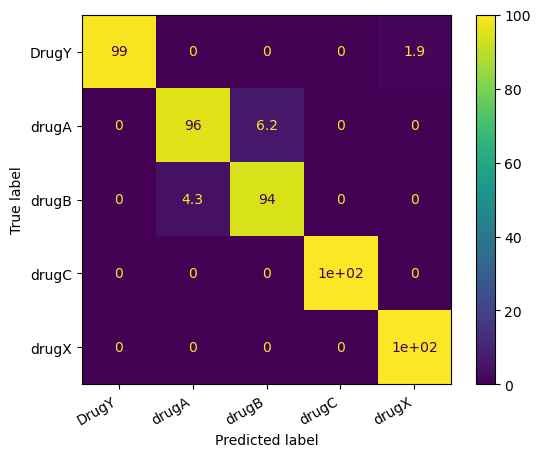

In [9]:
cm=confusion_matrix(y, y_pred, labels=clf.classes_)/confusion_matrix(y, y_pred, labels=clf.classes_).sum(axis=1)*100
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_).plot()
plt.xticks(rotation=30,ha="right")
plt.show()

## Vamos con el conjunto de datos de personalidades

In [10]:
data2=pd.read_csv("16P.csv", encoding='cp1252')
data2

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,59994,0,-1,0,-3,-2,2,1,0,1,...,0,2,0,1,0,0,2,3,3,INFJ
59995,59995,0,0,-2,1,3,0,-3,0,2,...,0,1,0,0,0,0,2,0,-2,ESTP
59996,59996,0,0,1,0,-2,-2,0,0,-1,...,-1,2,0,-3,0,1,-1,0,-1,ISTP
59997,59997,0,0,1,-1,-2,-1,2,0,1,...,0,2,0,2,0,0,0,1,0,ISTJ


In [11]:
data2["Personality"].value_counts()

Personality
ESFP    3769
INFJ    3761
ENFP    3760
ENTP    3760
ESTJ    3759
ISTJ    3756
ISTP    3755
ESTP    3749
ISFP    3746
ESFJ    3746
ENFJ    3743
INTJ    3743
INTP    3742
ISFJ    3739
ENTJ    3737
INFP    3734
Name: count, dtype: int64

In [12]:
#### Recuerde!!!!!
#1. Dividir el conjunto nen variables dependientes e independientes
X=data2.drop(columns="Personality")
y=data2["Personality"]

In [13]:
from sklearn.neural_network import MLPClassifier
# Carge el modelo vacío
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)
# Entrene el modelo
clf.fit(X, y)

/home/neno/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, random_state=1, solver='lbfgs')

In [14]:
# Prediga con el modelo
y_pred=clf.predict(X)

In [15]:
## Evalue el modelo
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
accuray = accuracy_score(y_pred, y)
f1 = f1_score(y_pred, y, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.06266771112851881
F1 Score: 0.11794308990117156


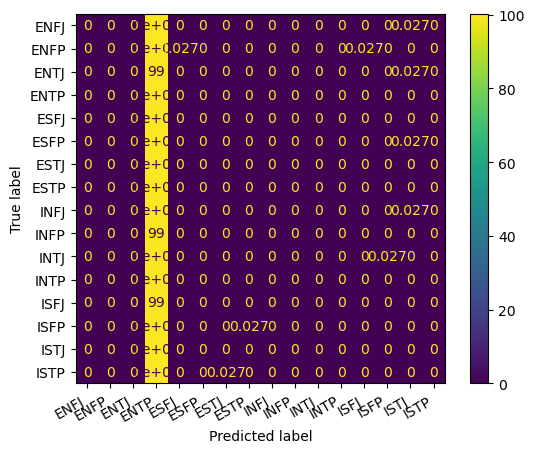

In [16]:
cm=confusion_matrix(y, y_pred, labels=clf.classes_)/confusion_matrix(y, y_pred, labels=clf.classes_).sum(axis=1)*100
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_).plot()
plt.xticks(rotation=30,ha="right")
plt.show()

In [17]:
y_pred

array(['ISFJ', 'ESTP', 'ISTJ', ..., 'ENTP', 'ENTP', 'ENTP'], dtype='<U4')